## GOAL
- Using **networkx** to initialize a network and compute the **density**, **transitivity**, **connectivity**, **average clustering coefficient** of network

## INITIALIZE

- Use the **Davis Southern women data** in networkx, **initialize** the network and **draw** it!
- References: https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.generators.social.davis_southern_women_graph.html#networkx.generators.social.davis_southern_women_graph

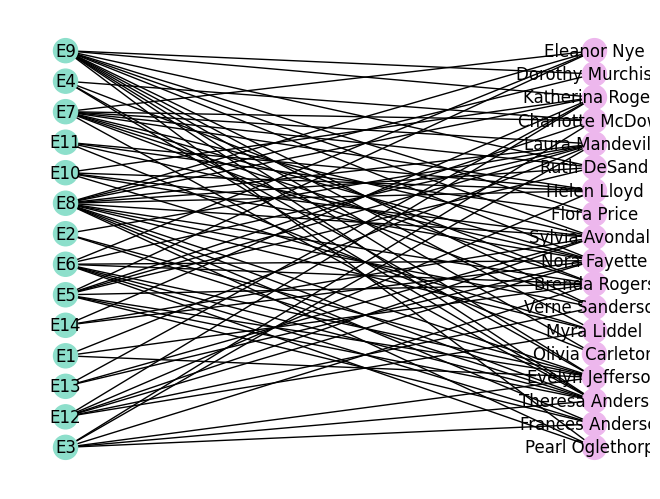

In [1]:
# 导入数据
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt
G = nx.davis_southern_women_graph()

#print(G.edges.data())  # 有bipartie的属性
#print(G.nodes)  # 没有权重
type1 = []
type2 = []
colors = []
#print(G.nodes.data())
for node in G.nodes:
    if G.nodes[node]['bipartite'] == 0:
        type1.append(node)
        colors.append('#EDB7ED')
    else:
        type2.append(node)
        colors.append('#8DDFCB')
        

nx.draw(G, with_labels=True, 
        pos=nx.bipartite_layout(G, type2),
        node_color=colors)

## 01 Compute the density of a graph.

In [2]:
print(f'The density of the graph is {nx.density(G):.3f}')

The density of the graph is 0.179


## 02 Compute graph transitivity, the fraction of all possible triangles present in G

- References: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.transitivity.html

In [3]:
print(f'transitivity = {nx.transitivity(G)}')
print('因为是bigragh，所以两个共享节点的边，连接的另外一个节点必然属于另一个类，这同类之间不会存在连接，所以不存在传递性。')

transitivity = 0
因为是bigragh，所以两个共享节点的边，连接的另外一个节点必然属于另一个类，这同类之间不会存在连接，所以不存在传递性。


## 03 Compute node connectivity for a graph G

- References: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.connectivity.connectivity.node_connectivity.html

In [4]:
print(f'node connectivity = {nx.node_connectivity(G)}')
print('最少需要移除多少个节点就可以使图不连通')

node connectivity = 2
最少需要移除多少个节点就可以使图不连通


## 04 Compute the average clustering coefficient for the graph G

- References: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html

In [5]:
print(nx.average_clustering(G))
print('一个节点的clutering等于其存在的三角关系除以可能的三角关系，一个三角关系即为课上讲的clique')

0.0
一个节点的clutering等于其存在的三角关系除以可能的三角关系，一个三角关系即为课上讲的clique


## BONUS1: What else indexes can be uesed to measure the structure of graph?

In [29]:
# k cliques
cliques = list(nx.find_cliques(G))
# 实际上所有的cliques都是长度为2的，所以图中不存在3个节点的cliques

# cores
# print(nx.degree(G))，得到所有节点的度都大于等于2
'''core_G = nx.k_core(G, k=4)
nx.draw(core_G, with_labels=True, 
        pos=nx.bipartite_layout(core_G, type2)
        )'''
# 代码发现，k=4时仍然有大部分节点，但是k=5时就没了，这类现象不知道是否在大多数图中存在，不过可以说明具有较高的依赖关系？

# k-components
dic = nx.k_components(G)
#[(item[0], len(item[1][0])) for item in list(dic.items())]  # [(4, 23), (3, 28), (2, 32), (1, 32)] 得到各个k-components的大小 

# 

[(4, 23), (3, 28), (2, 32), (1, 32)]


## BONUS2: What insights can you extract from the results of looking into the different indexes?